In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
moon = np.load('big_moon270.npz')
time = moon['time']
volts = moon['volts']

<IPython.core.display.Javascript object>


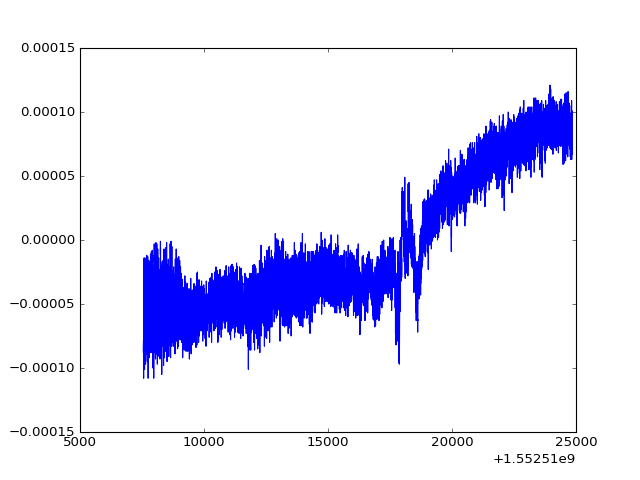

In [68]:
plt.plot(time, volts)
plt.show()

In [69]:
ftmoon = np.abs(np.fft.fft(volts))**2
freqs = np.fft.fftfreq(len(volts), 1)

<IPython.core.display.Javascript object>


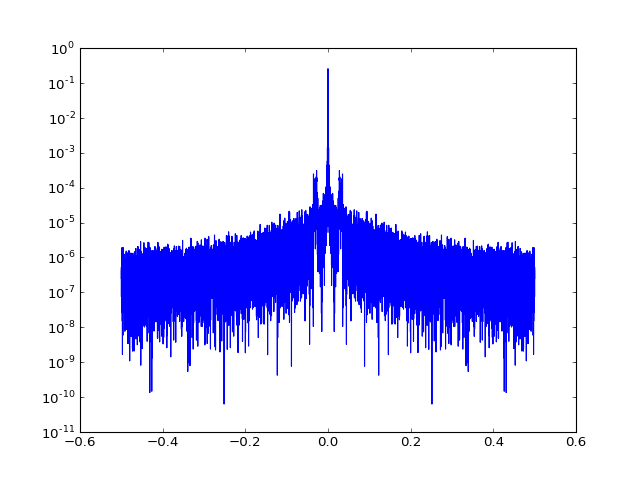

In [70]:
%matplotlib notebook
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(ftmoon))
plt.show()

## Big Moon Data

In [54]:
moon = np.load('big_moon270.npz')
time = moon['time']
volts = moon['volts']

<IPython.core.display.Javascript object>


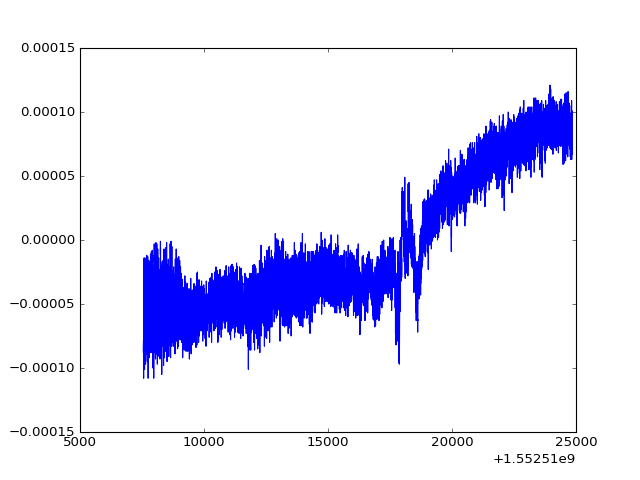

In [55]:
plt.plot(time, volts)
plt.show()

In [71]:
moonvolts = np.fft.fft(volts)
ftmoon = np.abs(moonvolts)**2
freqs = np.fft.fftfreq(len(volts), 1)

<IPython.core.display.Javascript object>


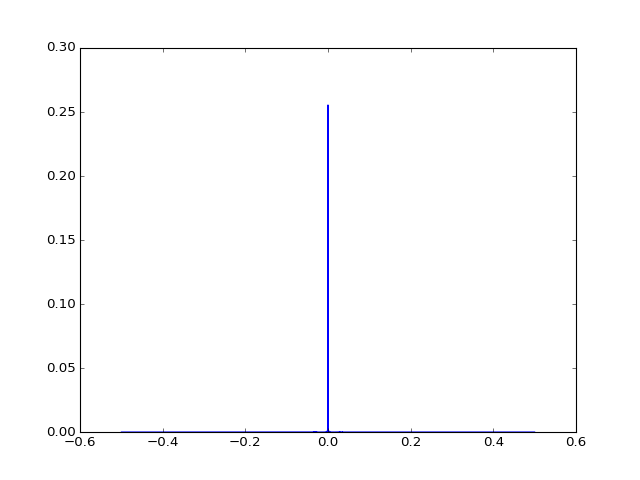

In [72]:
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(ftmoon))
plt.show()

In [81]:
freqs[np.where(np.abs(freqs) > 0.05)] = 0
freqs[np.where(np.abs(freqs) < 0.02)] = 0
freqs

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [82]:
moonvolts[np.where(np.abs(freqs) > 0.05)] = 0
moonvolts[np.where(np.abs(freqs) < 0.02)] = 0
ftmoon = np.abs(moonvolts)**2

<IPython.core.display.Javascript object>


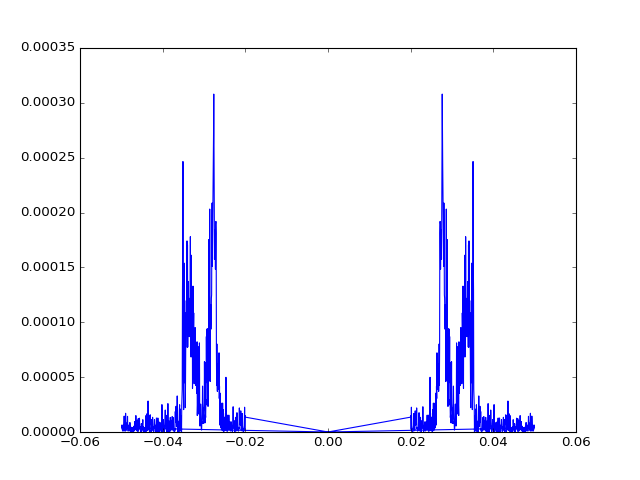

In [83]:
%matplotlib notebook
plt.plot(freqs, ftmoon)
plt.show()

In [84]:
invmoon = np.fft.ifft(moonvolts)
ftimes = np.fft.ifft(freqs)

<IPython.core.display.Javascript object>


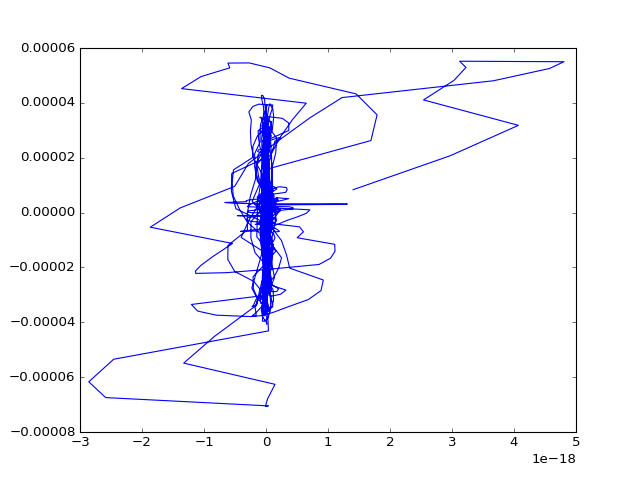

In [85]:
plt.plot(ftimes, invmoon)
plt.show()

In [64]:
finalmoon = np.fft.fft(invmoon)
ffreqs = np.fft.fft(ftimes)

<IPython.core.display.Javascript object>


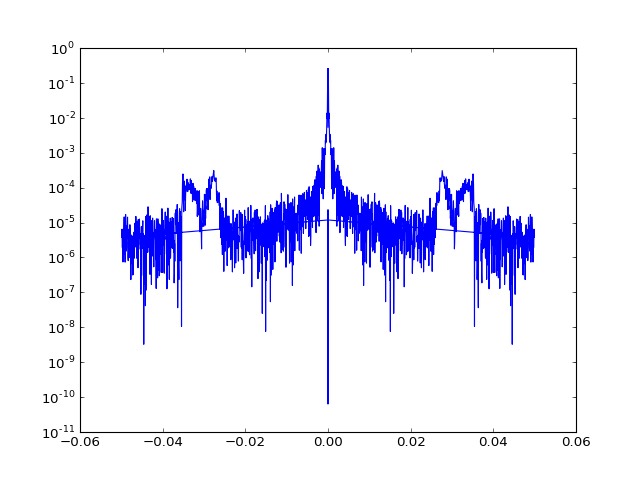

In [65]:
plt.plot(ffreqs, finalmoon)
plt.show()